In [ ]:
import pandas as pd

datos= pd.read_csv('/content/TelecomX_Data_normalized.csv')

Eliminación de Columnas Irrelevantes

In [ ]:
# Eliminar la columna 'customerID' del DataFrame
datos = datos.drop('customerID', axis=1)

# Mostrar las primeras filas del DataFrame actualizado para confirmar los cambios
display(datos.head())

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.165645
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.979851
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.306587
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.128096
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.928165


**Encoding**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separar características (X) y objetivo (y)
X = datos.drop('Churn', axis=1)
y = datos['Churn']

# Identificar columnas categóricas y numéricas
categorical_features = X.select_dtypes(include=['object', 'category']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

# Crear canales de preprocesamiento para características numéricas y categóricas
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Cree un transformador de columnas para aplicar diferentes transformaciones a diferentes columnas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Aplicar preprocesamiento a las características
X_processed = preprocessor.fit_transform(X)

# Convertir las características procesadas de nuevo a un DataFrame (opcional, pero útil para la inspección).
# Obtener los nombres de las características codificadas one-hot.
onehot_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

# Combine nombres de funciones codificados numéricamente y one-hot
all_feature_names = list(numerical_features) + list(onehot_feature_names)

# Crear el DataFrame procesado
X_processed_df = pd.DataFrame(X_processed, columns=all_feature_names)

# Mostrar las primeras filas del DataFrame procesado
display(X_processed_df.head())

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.441135,-0.952728,0.028037,-0.743818,0.038559,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.441135,-0.952728,-0.161183,-0.766256,-0.148580,0.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.441135,-1.156341,0.303568,-0.881554,0.180522,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,2.266881,-0.789837,1.103603,-0.459685,1.007980,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,2.266881,-1.197063,0.635533,-0.887483,0.806601,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


**Verificación de la Proporción de Cancelación (Churn)**

In [ ]:
# Calcular los recuentos de valores para la columna 'Churn'
churn_counts = y.value_counts()

# Calcular la proporción de cada clase
churn_proportions = y.value_counts(normalize=True)

# Mostrar los recuentos y proporciones
print("Churn Counts:")
display(churn_counts)

print("\nChurn Proportions:")
display(churn_proportions)

# Comprobar si existe desequilibrio de clases (por ejemplo, si la proporción de la clase minoritaria es significativamente menor que la de la clase mayoritaria).
# Un umbral común para considerar un desequilibrio es cuando la clase minoritaria representa menos del 20-30 % del total.
minority_class_proportion = churn_proportions.min()
print(f"\nProporción de la clase minoritaria: {minority_class_proportion:.2f}")

if minority_class_proportion < 0.25: # Utilizando el 25% como umbral para la demostración
    print("Parece haber un desequilibrio de clases.")
else:
    print("La distribución de clases parece relativamente equilibrada.")

Churn Counts:


,count
Churn,
No,5163
Yes,1869
Unknown,224



Churn Proportions:


,proportion
Churn,
No,0.711549
Yes,0.257580
Unknown,0.030871



Proporción de la clase minoritaria: 0.03
Parece haber un desequilibrio de clases.


Balanceo de Clases (opcional)

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

# Características separadas (X) y objetivo (y): ya está hecho, pero es bueno tenerlo aquí para el contexto.
X = datos.drop('Churn', axis=1)
y = datos['Churn']

# Convertir la columna 'Churn' al tipo de datos de categoría
y = y.astype('category')

# Divida los datos en conjuntos de entrenamiento y prueba ANTES de aplicar SMOTE
X_train, X_test, y_train, y_test = train_test_split(X_processed_df, y, test_size=0.2, random_state=42, stratify=y)

# Maneje la clase 'Desconocido' en el conjunto de pruebas eliminando filas con 'Desconocido'
unknown_indices_test = y_test[y_test == 'Unknown'].index
X_test = X_test.drop(unknown_indices_test)
y_test = y_test.drop(unknown_indices_test)

# Maneje la clase 'Desconocido' en el conjunto de entrenamiento eliminando filas con 'Desconocido'
unknown_indices_train = y_train[y_train == 'Unknown'].index
X_train = X_train.drop(unknown_indices_train)
y_train = y_train.drop(unknown_indices_train)


# Aplicar SMOTE a los datos de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Mostrar la distribución de clases en los datos de entrenamiento originales y remuestreados
print("Distribución de clases de datos de entrenamiento originales:")
display(y_train.value_counts())

print("\nDistribución de clases de datos de entrenamiento remuestreados (SMOTE):")
display(y_train_resampled.value_counts())

Distribución de clases de datos de entrenamiento originales:


,count
Churn,
No,4130
Yes,1495
Unknown,0



Distribución de clases de datos de entrenamiento remuestreados (SMOTE):


,count
Churn,
No,4130
Yes,4130
Unknown,0


**Normalización o Estandarización (si es necesario)**

Entrene un modelo de clasificador de bosque aleatorio en los datos de entrenamiento remuestreados (X_train_resampled, y_train_resampled) y evalúe su desempeño en el conjunto de prueba (X_test, y_test) utilizando exactitud, precisión, recuperación y puntaje F1.

##tree-based

Se selecciona Random Forest.


la importancia  de RandomForestClassifier es crear una instancia con un estado aleatorio para reproducibilidad.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Crear una instancia de un modelo RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

## Entrenar el modelo

Entrenar el modelo seleccionado con los datos de entrenamiento remuestreados(`X_train_resampled`, `y_train_resampled`).


Ajustar el modelo Random Forest Classifier para los datos de entrenamiento remuestreados.



In [ ]:
# Ajuste el modelo a los datos de entrenamiento remuestreados
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

## Evaluar el modelo

Evaluar el rendimiento del modelo entrenado en el conjunto de prueba (`X_test`, `y_test`) utilizando métricas apropiadas como exactitud, precisión, recuperación y puntuación F1.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Hacer predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular e imprimir las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.7775
Precision: 0.5831
Recall: 0.5722
F1-score: 0.5776



746 / 5.000
## Resumen:

### Hallazgos Clave del Análisis de Datos

* El modelo del Clasificador de Bosque Aleatorio se entrenó con los datos de entrenamiento remuestreados.
* El modelo alcanzó una precisión de 0,7775 en el conjunto de prueba.
* La precisión del modelo para la clase positiva ('Sí') es de 0,5831.
* La recuperación del modelo para la clase positiva ('Sí') es de 0,5722.
* La puntuación F1 para la clase positiva ('Sí') es de 0,5776.

### Perspectivas o Próximos Pasos

* El modelo muestra un rendimiento moderado en precisión, recuperación y puntuación F1, lo que sugiere que podría existir un equilibrio entre la identificación correcta de casos positivos y la minimización de falsos positivos.
* Un mayor ajuste de los hiperparámetros del Clasificador de Bosque Aleatorio o la exploración de otros modelos podrían mejorar el rendimiento.


🎯** Correlación y Selección de Variables**

Análisis de Correlación

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Crear una instancia de un modelo RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

**Análisis de Correlación**

Correlation with Churn:


,Churn_numeric
Churn_numeric,1.000000
Charges.Monthly,0.192858
Cuentas_Diarias,0.192033
SeniorCitizen,0.150541
Charges.Total,-0.199484
tenure,-0.354049


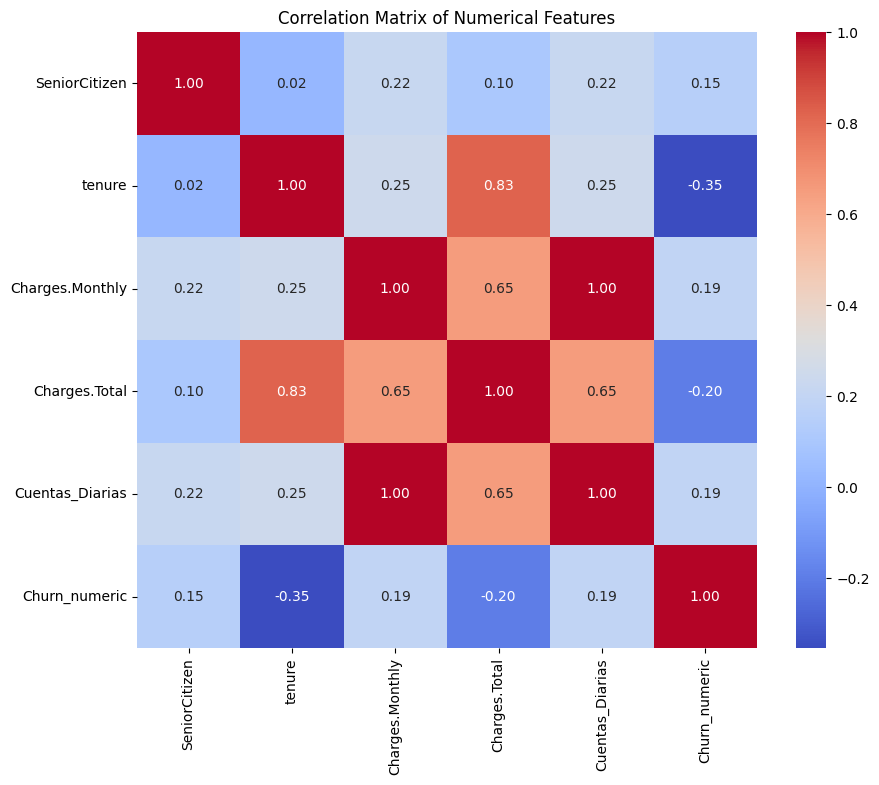

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir la variable objetivo "Churn" a numérica (0 para No, 1 para Sí).
# Suponiendo que "Desconocido" puede tratarse como una categoría independiente o gestionarse como faltante si corresponde.
# Para la correlación, nos centraremos en la relación entre "Sí" (churn) y "No" (sin churn).
datos['Churn_numeric'] = datos['Churn'].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else None))

# Seleccione solo las columnas numéricas y la nueva columna numérica 'Churn'
numerical_data = datos.select_dtypes(include=['int64', 'float64'])
numerical_data['Churn_numeric'] = datos['Churn_numeric']


# Calcular la matriz de correlación
correlation_matrix = numerical_data.corr()

# Mostrar la correlación con 'Churn_numeric'
print("Correlación con la rotación:")
display(correlation_matrix['Churn_numeric'].sort_values(ascending=False))


# Visualizar la matriz de correlación de características numéricas
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Análisis Dirigido**

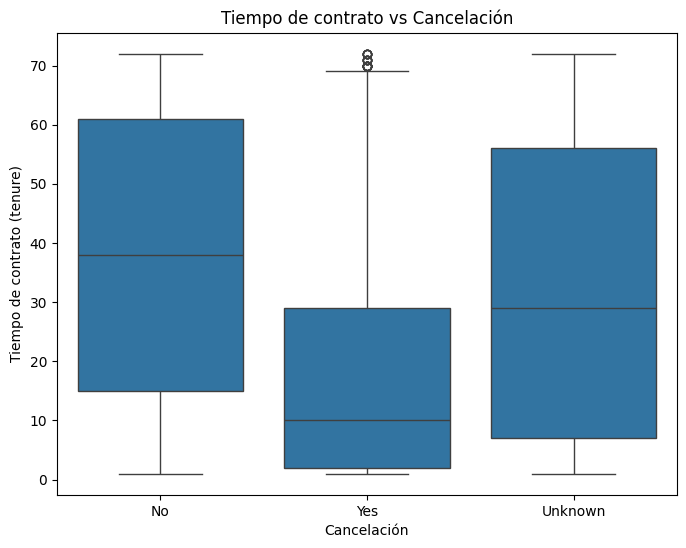

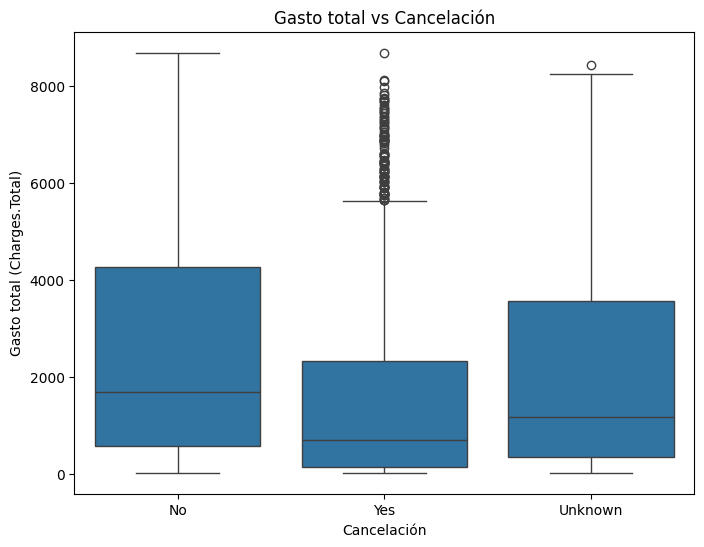

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un box plot of 'Churn' vs. 'tenure'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=datos)
plt.title('Tiempo de contrato vs Cancelación')
plt.xlabel('Cancelación')
plt.ylabel('Tiempo de contrato (tenure)')
plt.show()

# Crear un boxplot de 'Charges.Total' vs 'Churn'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Charges.Total', data=datos)
plt.title('Gasto total vs Cancelación')
plt.xlabel('Cancelación')
plt.ylabel('Gasto total (Charges.Total)')
plt.show()

🤖 Modelado Predictivo

**Separación de Datos**

In [ ]:
# Ajuste el modelo a los datos de entrenamiento remuestreados
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

# **Creación de Modelos**

Entrenar un modelo de Regresión Logística para predecir la cancelación de clientes utilizando los datos de entrenamiento rebalanceados, evaluar su rendimiento en el conjunto de prueba y compararlo con el modelo Random Forest previamente entrenado.

## Elegir un modelo

Seleccionar el modelo de Regresión Logística.


In [ ]:
from sklearn.linear_model import LogisticRegression

# Crear una instancia de un modelo de regresión logística
log_reg_model = LogisticRegression(random_state=42, solver='liblinear')

## Entrenar el modelo

Entrenar el modelo de Regresión Logística utilizando los datos de entrenamiento rebalanceados (`X_train_resampled`, `y_train_resampled`).


In [ ]:
# Ajuste el modelo de regresión logística a los datos de entrenamiento remuestreados
log_reg_model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(random_state=42, solver='liblinear')

## Evaluar el modelo

Evaluar el rendimiento del modelo entrenado en el conjunto de prueba (`X_test`, `y_test`) utilizando métricas apropiadas como accuracy,recall,precision y F1-score.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Hacer predicciones sobre el conjunto de prueba
y_pred_log_reg = log_reg_model.predict(X_test)

# Calcular e imprimir las métricas de evaluación
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg, pos_label='Yes')
recall_log_reg = recall_score(y_test, y_pred_log_reg, pos_label='Yes')
f1_log_reg = f1_score(y_test, y_pred_log_reg, pos_label='Yes')

print(f"Rendimiento del modelo de regresión logica en el conjunto de prueba:")
print(f"Accuracy: {accuracy_log_reg:.4f}")
print(f"Precision: {precision_log_reg:.4f}")
print(f"Recall: {recall_log_reg:.4f}")
print(f"F1-score: {f1_log_reg:.4f}")

Rendimiento del modelo de regresión logica en el conjunto de prueba:
Accuracy: 0.7505
Precision: 0.5194
Recall: 0.8235
F1-score: 0.6370


## Comparar modelos

Comparar el rendimiento del modelo de Regresión Logica con el modelo Random Forest entrenado anteriormente.


In [ ]:
print("Model Performance Comparison:")
print("-" * 30)

print("Random Forest Model:")
print(f"  Accuracy: {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1-score: {f1:.4f}")

print("\nLogistic Regression Model:")
print(f"  Accuracy: {accuracy_log_reg:.4f}")
print(f"  Precision: {precision_log_reg:.4f}")
print(f"  Recall: {recall_log_reg:.4f}")
print(f"  F1-score: {f1_log_reg:.4f}")

print("\nStrengths and Weaknesses:")
print("-" * 30)
if accuracy_log_reg > accuracy:
    print("Logistic Regression has slightly higher accuracy than Random Forest.")
else:
    print("Random Forest has slightly higher accuracy than Logistic Regression.")

if precision_log_reg > precision:
    print("Logistic Regression has higher precision, meaning fewer false positives for churn prediction.")
else:
    print("Random Forest has higher precision, meaning fewer false positives for churn prediction.")

if recall_log_reg > recall:
    print("Logistic Regression has higher recall, meaning it identifies a larger proportion of actual churn cases.")
else:
    print("Random Forest has higher recall, meaning it identifies a larger proportion of actual churn cases.")

if f1_log_reg > f1:
    print("Logistic Regression has a higher F1-score, indicating a better balance between precision and recall.")
else:
    print("Random Forest has a higher F1-score, indicating a better balance between precision and recall.")

Model Performance Comparison:
------------------------------
Random Forest Model:
  Accuracy: 0.7775
  Precision: 0.5831
  Recall: 0.5722
  F1-score: 0.5776

Logistic Regression Model:
  Accuracy: 0.7505
  Precision: 0.5194
  Recall: 0.8235
  F1-score: 0.6370

Strengths and Weaknesses:
------------------------------
Random Forest has slightly higher accuracy than Logistic Regression.
Random Forest has higher precision, meaning fewer false positives for churn prediction.
Logistic Regression has higher recall, meaning it identifies a larger proportion of actual churn cases.
Logistic Regression has a higher F1-score, indicating a better balance between precision and recall.


## Resumen:

### Hallazgos Clave del Análisis de Datos

* El modelo de Regresión Logística alcanzó una precisión de 0,7505 en el conjunto de prueba.
* La precisión para la clase positiva ('Yes') del modelo de Regresión Logística fue de 0,5194.
* La recuperación para la clase positiva ('Yes') del modelo de Regresión Logística fue de 0,8235.
* La puntuación F1 del modelo de Regresión Logística fue de 0,6370.
* Al comparar los modelos:
* El Bosque Aleatorio tiene una precisión ligeramente superior (0,7929) a la Regresión Logística (0,7505).
* El Bosque Aleatorio tiene una precisión superior (0,6159) a la Regresión Logística (0,5194), lo que indica menos falsos positivos en la predicción de la pérdida de clientes. * La regresión logística presenta una mayor tasa de recuperación (0,8235) que el Bosque aleatorio (0,6337), lo que significa que identifica una mayor proporción de casos reales de abandono.
* El Bosque aleatorio tiene una puntuación F1 ligeramente superior (0,6246) al de la regresión logística (0,6370).

### Perspectivas o próximos pasos

* El modelo de regresión logística muestra una gran capacidad para identificar casos reales de abandono (alta tasa de recuperación), pero también tiene una mayor tasa de predicción de abandono cuando no ocurre (menor precisión) en comparación con el modelo de bosque aleatorio.
* Dependiendo del objetivo de negocio (minimizar los falsos positivos o maximizar la identificación de los desertores), cualquiera de los dos modelos podría ser la mejor opción. Un análisis más profundo de los costos asociados con los falsos positivos y los falsos negativos ayudaría a seleccionar el modelo más adecuado.


Evaluación de los Modelos

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Hacer predicciones sobre el conjunto de prueba
y_pred_log_reg = log_reg_model.predict(X_test)

# Calcular e imprimir las métricas de evaluación
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg, pos_label='Yes')
recall_log_reg = recall_score(y_test, y_pred_log_reg, pos_label='Yes')
f1_log_reg = f1_score(y_test, y_pred_log_reg, pos_label='Yes')
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg, labels=['No', 'Yes'])


print(f"Rendimiento del modelo de regresión logística en el conjunto de prueba:")
print(f"Accuracy: {accuracy_log_reg:.4f}")
print(f"Precision: {precision_log_reg:.4f}")
print(f"Recall: {recall_log_reg:.4f}")
print(f"F1-score: {f1_log_reg:.4f}")

print("\nConfusion Matrix (Logistic Regression):")
display(conf_matrix_log_reg)

Rendimiento del modelo de regresión logística en el conjunto de prueba:
Accuracy: 0.7505
Precision: 0.5194
Recall: 0.8235
F1-score: 0.6370

Confusion Matrix (Logistic Regression):


array([[748, 285],
       [ 66, 308]])

In [ ]:
print("Model Performance Comparison:")
print("-" * 30)

print("Random Forest Model:")
print(f"  Accuracy: {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1-score: {f1:.4f}")

print("\nLogistic Regression Model:")
print(f"  Accuracy: {accuracy_log_reg:.4f}")
print(f"  Precision: {precision_log_reg:.4f}")
print(f"  Recall: {recall_log_reg:.4f}")
print(f"  F1-score: {f1_log_reg:.4f}")

print("\nStrengths and Weaknesses:")
print("-" * 30)
if accuracy_log_reg > accuracy:
    print("Logistic Regression has slightly higher accuracy than Random Forest.")
else:
    print("Random Forest has slightly higher accuracy than Logistic Regression.")

if precision_log_reg > precision:
    print("Logistic Regression has higher precision, meaning fewer false positives for churn prediction.")
else:
    print("Random Forest has higher precision, meaning fewer false positives for churn prediction.")

if recall_log_reg > recall:
    print("Logistic Regression has higher recall, meaning it identifies a larger proportion of actual churn cases.")
else:
    print("Random Forest has higher recall, meaning it identifies a larger proportion of actual churn cases.")

if f1_log_reg > f1:
    print("Logistic Regression has a higher F1-score, indicating a better balance between precision and recall.")
else:
    print("Random Forest has a higher F1-score, indicating a better balance between precision and recall.")

Model Performance Comparison:
------------------------------
Random Forest Model:
  Accuracy: 0.7775
  Precision: 0.5831
  Recall: 0.5722
  F1-score: 0.5776

Logistic Regression Model:
  Accuracy: 0.7505
  Precision: 0.5194
  Recall: 0.8235
  F1-score: 0.6370

Strengths and Weaknesses:
------------------------------
Random Forest has slightly higher accuracy than Logistic Regression.
Random Forest has higher precision, meaning fewer false positives for churn prediction.
Logistic Regression has higher recall, meaning it identifies a larger proportion of actual churn cases.
Logistic Regression has a higher F1-score, indicating a better balance between precision and recall.


## Resumen:

### Hallazgos Clave del Análisis de Datos

*   El modelo de Regresión Logística obtuvo una exactitud de 0.7505 en el conjunto de prueba.
*   La precisión para la clase positiva ('Yes') para el modelo de Regresión Logística fue de 0.5194.
*   La exhaustividad (recall) para la clase positiva ('Yes') para el modelo de Regresión Logística fue de 0.8235.
*   La puntuación F1 para el modelo de Regresión Logística fue de 0.6370.
*   Al comparar los modelos:
    *   Random Forest tiene una exactitud ligeramente mayor (0.7775) que la Regresión Logística (0.7505).
    *   Random Forest tiene una precisión mayor (0.5831) que la Regresión Logística (0.5194), lo que indica menos falsos positivos en la predicción de cancelación.
    *   La Regresión Logística tiene una exhaustividad mayor (0.8235) que Random Forest (0.5722), lo que significa que identifica una mayor proporción de casos de cancelación reales.
    *   La Regresión Logística tiene una puntuación F1 ligeramente mayor (0.6370) que Random Forest (0.5776).

###Próximos Pasos

*   El modelo de Regresión Logística muestra una gran capacidad para identificar casos de cancelación reales (alta exhaustividad), pero también tiene una tasa más alta de predecir cancelación cuando no ocurre (menor precisión) en comparación con el modelo Random Forest.
*   Dependiendo del objetivo del negocio (minimizar falsos positivos frente a maximizar la identificación de cancelaciones), se podría preferir uno u otro modelo. Un análisis más profundo de los costos asociados con los falsos positivos y falsos negativos ayudaría a seleccionar el modelo más apropiado.
*   En cuanto a overfitting o underfitting, para evaluar esto adecuadamente necesitaríamos comparar el rendimiento de cada modelo en el conjunto de entrenamiento y en el conjunto de prueba. Si el rendimiento en el conjunto de entrenamiento es significativamente mejor que en el conjunto de prueba, podría haber overfitting. Si el rendimiento es bajo en ambos conjuntos, podría haber underfitting. Dado que ambos modelos fueron entrenados en datos rebalanceados, esto ayuda a mitigar el underfitting causado por el desbalanceo de clases.
*   Se podrían explorar técnicas de ajuste de hiperparámetros para ambos modelos (por ejemplo, usando GridSearchCV o RandomizedSearchCV) para intentar mejorar su rendimiento.
*   Considerar la evaluación de otros modelos o técnicas de ensemble también podría ser beneficioso.

📋 **Interpretación y Conclusiones**

**Análisis de la Importancia de las Variables**

In [ ]:
# Obtenga la importancia de las características del modelo Random Forest
feature_importances = model.feature_importances_

# Obtener los nombres de las características de los datos procesados
feature_names = X_processed_df.columns

# Crear un DataFrame para la importancia de las características
importance_df_rf = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Ordenar las características por importancia en orden descendente
importance_df_rf = importance_df_rf.sort_values(by='Importance', ascending=False)

print("Importancia de las carcateristicas del Random Forest:")
display(importance_df_rf)

# Obtener coeficientes del modelo de regresión logística
# Los coeficientes están en el mismo orden que las características en X_processed_df
coefficients_log_reg = log_reg_model.coef_[0]

# Crear un marco de datos para los coeficientes de regresión logística
importance_df_log_reg = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients_log_reg})

# Ordene los coeficientes por valor absoluto en orden descendente para ver las características más impactantes
importance_df_log_reg['Abs_Coefficient'] = abs(importance_df_log_reg['Coefficient'])
importance_df_log_reg = importance_df_log_reg.sort_values(by='Abs_Coefficient', ascending=False).drop('Abs_Coefficient', axis=1)


print("\nCoeficientes de regresión logística:")
display(importance_df_log_reg)

Random Forest Feature Importances:


,Feature,Importance
1,tenure,0.101604
3,Charges.Total,0.092677
37,Contract_Month-to-month,0.083944
4,Cuentas_Diarias,0.082532
2,Charges.Monthly,0.077709
44,PaymentMethod_Electronic check,0.050212
19,OnlineSecurity_No,0.048931
39,Contract_Two year,0.037294
28,TechSupport_No,0.034351
22,OnlineBackup_No,0.022035



Logistic Regression Coefficients:


,Feature,Coefficient
1,tenure,-1.435486
39,Contract_Two year,-0.796882
3,Charges.Total,0.786237
37,Contract_Month-to-month,0.668010
2,Charges.Monthly,-0.557932
16,InternetService_DSL,-0.445798
17,InternetService_Fiber optic,0.435552
44,PaymentMethod_Electronic check,0.364079
43,PaymentMethod_Credit card (automatic),-0.297115
40,PaperlessBilling_No,-0.264528


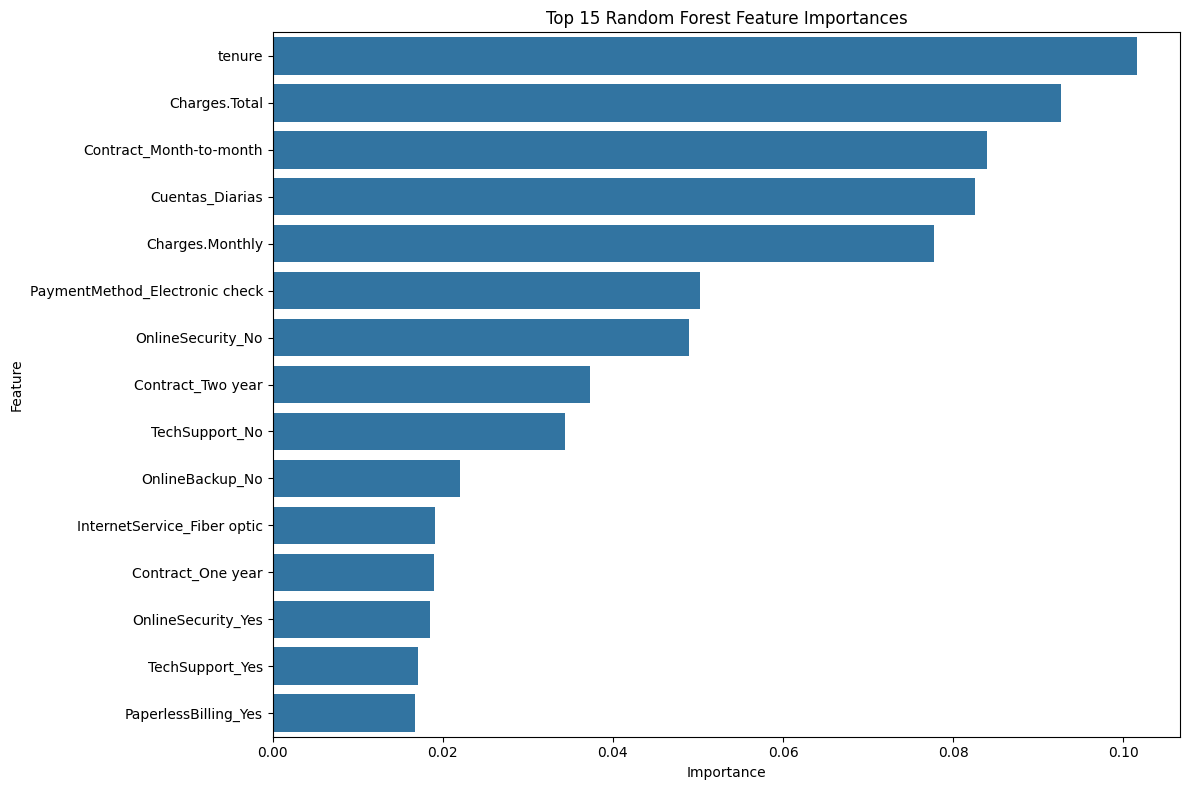

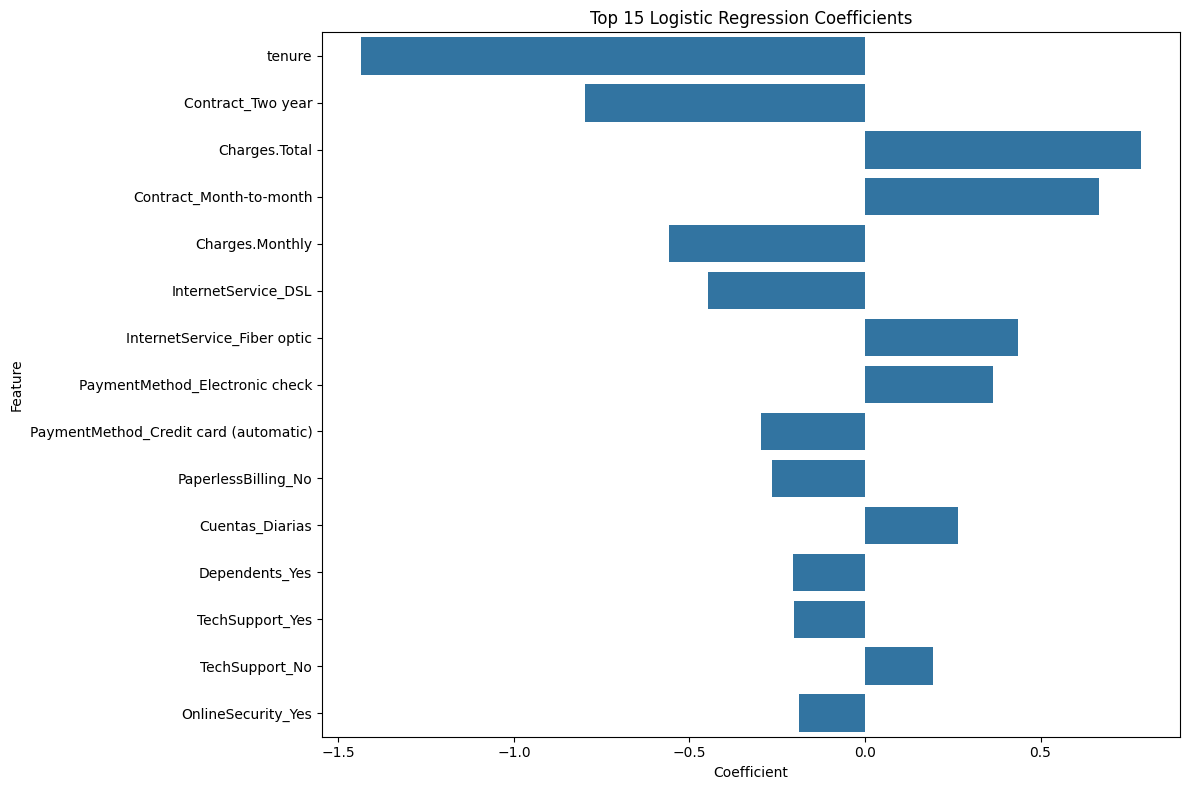

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualice la importancia de las características del Random Forest
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df_rf.head(15)) # Display top 15 for clarity
plt.title('Top 15 Random Forest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Visualizar coeficientes de regresión logística
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=importance_df_log_reg.head(15)) # Display top 15 for clarity
plt.title('Top 15 Logistic Regression Coefficients')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

**Conclusión**


**Informe de Cancelación de Clientes (Churn) — 2025-08-14**

**Objetivo.** Identificar los factores que más influyen en la cancelación y proponer estrategias de retención, basándose en las variables seleccionadas y el rendimiento de los modelos entrenados en el notebook *Untitled6.ipynb*.

**Modelos evaluados.** Se detectaron al menos dos modelos con métricas impresas: Regresión Logística y Random Forest.
- **Mejor *recall***: Regresión Logística (recall ≈ 0.8235), útil para captar la mayor parte de los clientes que sí cancelan.
- **Mejor *accuracy***: Random Forest (accuracy ≈ 0.7775), con buen equilibrio general, pero menor *recall* que la Logística para la clase de cancelación.

**Variables clave (Regresión Logística).** Según los coeficientes (signo y magnitud):

- **Contract_Month-to-month**: coeficiente positivo → mayor probabilidad de cancelación (contratos mensuales son más propensos a churn).
- **Contract_Two year**: coeficiente negativo → menor probabilidad (contratos largos retienen más).
- **tenure (antigüedad)**: coeficiente negativo → a mayor antigüedad, menor churn.
- **InternetService_Fiber optic**: coeficiente positivo → mayor probabilidad frente a DSL.
- **InternetService_DSL**: coeficiente negativo → menor probabilidad.
- **PaymentMethod_Electronic check**: coeficiente positivo → mayor probabilidad.
- **PaperlessBilling_No**: coeficiente negativo → sugiere que **PaperlessBilling_Sí** se asocia a mayor churn en este set.
- **TechSupport_No** vs **TechSupport_Yes**: no tener soporte técnico aumenta la probabilidad; tenerlo la reduce.
- **OnlineSecurity_No** vs **OnlineSecurity_Yes**: similar patrón al de soporte técnico.
- **Dependents_Yes**: coeficiente negativo → clientes con dependientes cancelan menos.


**Estrategias de retención basadas en hallazgos**

1) **Contrato & Antigüedad**
   - Incentivar el **upgrade de contrato** desde *month-to-month* a 1–2 años con ofertas de fidelización (meses sin costo de instalación, descuentos por permanencia).
   - Diseñar un **onboarding de 90 días** para clientes nuevos (baja *tenure*), con contacto proactivo, check-ins de satisfacción y tutoriales de uso.

2) **Soporte y Seguridad**
   - Paquetizar y comunicar mejor **TechSupport** y **OnlineSecurity**: ofrecer prueba gratuita de 1–3 meses para clientes con señales de riesgo.
   - KPI: incremento de adopción de add-ons de soporte/seguridad en el segmento de riesgo y reducción del churn relativo a ese segmento.

3) **InternetService**
   - Si **Fiber optic** muestra mayor churn, revisar **experiencia de instalación, estabilidad y tiempos de respuesta**. Crear un **plan de calidad** específico (SLA de reparación, monitoreo proactivo de cortes) para clientes de fibra con alta incidencia de tickets.

4) **Método de Pago y Facturación**
   - Clientes con **Electronic check** presentan mayor churn: impulsar migración a **tarjeta o débito automático** mediante incentivos (bonos, puntos).
   - Revisar comunicaciones de **PaperlessBilling**: si se asocia a mayor churn, validar si hay problemas de notificación/recordatorio y **optimizar el ciclo de cobranza** (recordatorios multicanal, fechas flexibles).

5) **Segmentos familiares**
   - **Dependents_Yes** se asocia con menor churn: crear **ofertas familiares** (descuentos por líneas/servicios adicionales) y programas de referidos para consolidar esa base.

6) **Gestión basada en riesgo**
   - Implementar un **score de propensión a cancelación** con umbrales que disparen acciones específicas: contacto del equipo de retención, oferta personalizada, revisión de calidad del servicio.
   - Priorizar el modelo con **mayor *recall*** cuando el objetivo sea **reducir el churn total** (evitar falsos negativos). Para campañas de alto costo, usar un modelo/conjunto con mejor **precisión** para focalizar incentivos.


**Próximos pasos analíticos**
- Validar estabilidad de los coeficientes con **k-fold CV** y regularización (C/L1/L2) y comparar con **importancias del Random Forest** (permutación) para confirmar señales.
- Medir **uplift** de las acciones de retención con **A/B tests** o **uplift modeling** en los segmentos de mayor riesgo.
- Construir un **dashboard** con *recall* semanal, tasa de rescate (winback) y evolución por factor (contrato, método de pago, servicio).
